Pandas je python knjižnjica namenjena za uporabo pri analizo podatkov. Omogoča nam računanje statističnih podatkov (max, min, povprečje, data distribution, itd..). Omogoča nam čiščenje podatkov, filtracijo in vizualizacijo.

# Install

```python
pip install pandas
```

In [1]:
import pandas as pd

# Basic objects

Pandas v glavnem operira z dvema primarnima objektoma:

**Series** in **DataFrame**.
* Series predstavlja en stolpec podatkov
* DataFrame predstavlja tabelo podatkov

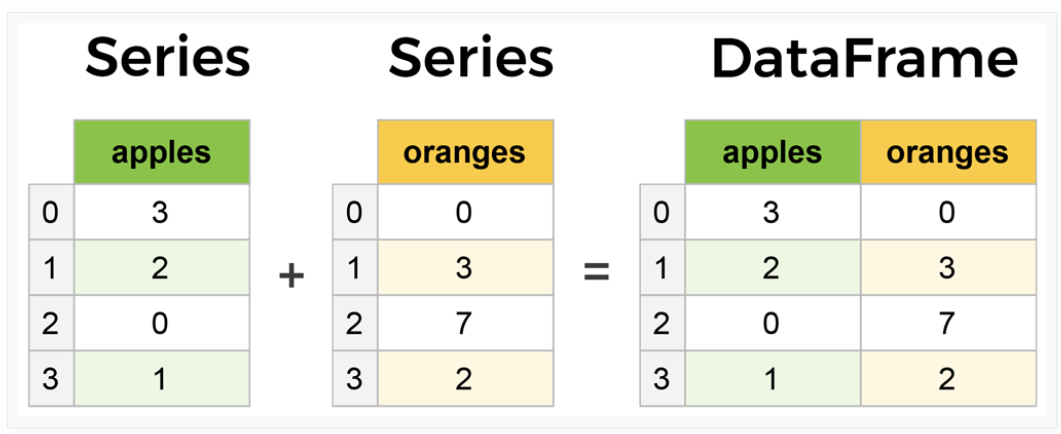

Series ustvarimo s preprostim ukazom:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(type(data))
print(data)

<class 'pandas.core.series.Series'>
0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


Pri izpisu vidimo naše podatke (`values`) in številčne vrednosti, ki predstavljajo index vrstic (`index`). 

In [3]:
print(data.values)
print(data.index)

[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


Tako kot pri numpy lahko do vrednosti dostopamo preko indexa.

In [4]:
print(data[1])
print()
print(data[0:2])

0.5

0    0.25
1    0.50
dtype: float64


Index ne potrebuje biti številčna vrednost. Lahko ga definiramo sami:

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=["a", "b", "c", "d"])
print(data)
print(data["a"])
print(data["b":])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [6]:
# ustvarjanje Series s pomočjo dictionary
data = pd.Series({
    "a": 0.25,
    "b": 0.5,
    "c": 0.75,
    "d": 1
})
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


DataFrame je skupek Series in ga lahko prav tako ustvarimo na več načinov.

Eden izmed načinov je s pomočjo dictionary, kjer vsak **key:value** par predstavlja stolpec v našem DataFrame. 

In [7]:
data = {
    "apples": [3,1,0,4],
    "oranges": [2,0,3,1]
}

df = pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,apples,oranges
0,3,2
1,1,0
2,0,3
3,4,1


Index je bil določen samodejno, vendar ga lahko prav tako tudi sami določimo.

In [8]:
data = {
    "jabolka": [3,1,0,4],
    "pomaranče": [2,0,3,1]
}

df = pd.DataFrame(data, index=["Maja", "Janez", "Jaka", "Živa"])
df

,jabolka,pomaranče
Maja,3,2
Janez,1,0
Jaka,0,3
Živa,4,1


# Basic info from our data

Za začetek bomo uvozili večjo količino podatkov. Uporabili bomo IMDB dataset, kjer je shranjeno 1000 najpopularnejših filmov od 2006 do 2016.

https://we.tl/t-aXOfVSSyer

In [9]:
data = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

Za hiter pregled lahko uporabimo funkcijo `df.head()` - ki nam pokaže prvih 5 vrstic - ali funkcijo `df.tail()` - ki nam pokaže zadnjih 5 vrstic.

In [10]:
data.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Za pregled osnovnih značilnosti našega DataFrame lahko uporabimo funkcijo `df.info()`.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


V izpisu vidimo koliko vrstic vsebuje naš DataFrame, koliko stolpcev, imena stolpcev, kakšen data tip se nahaja v stolpcu, itd..

S pomočjo funkcije `describe()` lahko najdemo osnovne statistične parametre, kot so min, max, distribucija, itd..

In [12]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Za bolj podroben opis vsakega stolpca lahko uporabimo funkcijo `value_counts()`.

In [13]:
data["Director"].value_counts()

Ridley Scott          8
David Yates           6
Michael Bay           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
                     ..
Sharon Maguire        1
Steven R. Monroe      1
Richard Curtis        1
Rupert Sanders        1
Julia Ducournau       1
Name: Director, Length: 644, dtype: int64

# Slicing, selecting, extracting data

Iz našega DataFrame lahko izberemo specifičen stolpec na sledeč način:

In [14]:
genre = data["Genre"]
print(type(genre))
print(genre)

<class 'pandas.core.series.Series'>
Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
                                     ...           
Secret in Their Eyes            Crime,Drama,Mystery
Hostel: Part II                              Horror
Step Up 2: The Streets          Drama,Music,Romance
Search Party                       Adventure,Comedy
Nine Lives                    Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object


Tako dobimo Series object.

Če želimo izbrati samo en stolpec in ohraniti DatFrame object to storimo:

In [15]:
genre_df = data[["Genre"]]
print(type(genre_df))
genre_df

<class 'pandas.core.frame.DataFrame'>


,Genre
Title,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi"
Prometheus,"Adventure,Mystery,Sci-Fi"
Split,"Horror,Thriller"
Sing,"Animation,Comedy,Family"
Suicide Squad,"Action,Adventure,Fantasy"
...,...
Secret in Their Eyes,"Crime,Drama,Mystery"
Hostel: Part II,Horror
Step Up 2: The Streets,"Drama,Music,Romance"


Če želimo izbrati več stolpcev hkrati:

In [16]:
subset = data[["Genre", "Director"]]
subset

,Genre,Director
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn
Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott
Split,"Horror,Thriller",M. Night Shyamalan
Sing,"Animation,Comedy,Family",Christophe Lourdelet
Suicide Squad,"Action,Adventure,Fantasy",David Ayer
...,...,...
Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray
Hostel: Part II,Horror,Eli Roth
Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu


Vzememo lahko tudi celotne vrstice oziroma specifične vrednosti:
* `.loc[row, column]` - kjer do vrstic dostopamo preko njihovega imena (index)
* `.iloc[row, column]` - kjer do vrstic dostopamo preko njihovega števičnega indexa

In [17]:
prometheus = data.loc["Prometheus"]
print(type(prometheus))
print(prometheus)

<class 'pandas.core.series.Series'>
Rank                                                                  2
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                              7.0
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                          65.0
Name: Prometheus, dtype: object


In [18]:
prometheus = data.iloc[1, 3]
print(type(prometheus))
print(prometheus)

<class 'str'>
Ridley Scott


Uporabljamo lahko tudi slicing:

In [19]:
subset = data.loc["Prometheus":"Sing"]
print(type(subset))
subset

<class 'pandas.core.frame.DataFrame'>


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [20]:
subset = data.iloc[1:4]
print(type(subset))
subset

<class 'pandas.core.frame.DataFrame'>


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


Opazimo, da slicing pri `.loc` vključuje zadnji element medtem, ko `.iloc` ne vključuje zadnjega elementa.

Vrstice lahko izberamo tudi po specifičnih pogojih. Za primer bomo vzeli vsako vrstico, kjer je bil direktor "Ridley Scott".

In [21]:
pogoj = (data["Director"] == "Ridley Scott")
print(pogoj)

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
                           ...  
Secret in Their Eyes       False
Hostel: Part II            False
Step Up 2: The Streets     False
Search Party               False
Nine Lives                 False
Name: Director, Length: 1000, dtype: bool


In [22]:
rs = data[pogoj]
rs

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


Pri našem izboru lahko uporabimo več kot en pogoj, katere med seboj združimo s pomočjo `|` in `&`.

In [23]:
pogoj1 = data["Director"] == "Ridley Scott"
pogoj2 = data["Metascore"] > 60

subset = data[pogoj1 & pogoj2]
subset

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


# Primer analize dataseta - Ebay Car Sales Data

Analizirali bomo dataset oglasov rabljenih avto s strani *eBay Kleinanzeigen* (nemški ebay).

Podatki v datasetu so sledeči:
* **dateCrawled** - kdaj je program prvič našel oglas
* **name** - ime avta
* **seller** - podatek ali je prodajalec privatni ali ne
* **offerType** - tip ponudbe
* **price** - cena
* **abtest** - ali je avto vključen v A/B test
* **vehicleType** - tip vozila
* **yearOfRegistration** - leto v katerem je bilo vozilo registrirano
* **gearbox** - tip menjalnika
* **powerPS** - moč vozila v PS
* **model** - model vozila
* **kilometer** - koliko kilometrov je že prevoženih
* **monthOfRegistration** - mesec v katerem je bilo vozilo prvič registrirano
* **fuelType** - tip goriva 
* **brand** - znamka vozila
* **notRepairedDamage** - če ima vozilo še ne-popravljene poškodbe
* **dateCreated** - datum kdaj je bil oglas ustvarjen
* **nrOfPictures** - število slik v oglasu
* **postalCode** - poštna številka kjer se vozilo nahaja
* **lastSeenOnline** - kdaj je program zadnjič videl oglas

Začnemo z uvozom podatkov in osnovnimi informacijami o datasetu:

In [24]:
import pandas as pd

autos = pd.read_csv('data/autos.csv', encoding='Latin-1')

In [25]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [26]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Vidimo, da imamo 50'000 vrstic.

Od tega ima par stolpcev več neveljavnih vrednosti kar bo potrebno preveriti.

Večina vrednosti so "strings" (object), preostale pa so številčne.

Vidimo, da **price** in **odometer** nista številčni vrednosti, kar bo potrebno preveriti.

# Cleaning the data

Za začetek bomo preimenovali stolpce v *snake_case*.

In [27]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [28]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

In [29]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Za bolj natančen opis kaj se dogaja z vrednostmi v stolpcih lahko uporabimo **describe** metodo.

In [30]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Vidimo, da ima **seler stolpec** skoraj vse vrednosti enake. Prav tako stolpec **offer_type**.

Ta dva stolpca lahko odstranimo saj nam ne moreta pomagati pri analizi dataseta.

Odstranimo lahko tudi stolpec **num_photos** saj so vse vrednosti v stolpcu enake 0.

In [31]:
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1)
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Poglejmo si sedaj stolpca **price** in **odometer_km**.

Vrednosti v stolpcih bi morale biti številčne vendar so tipa *string*.

In [32]:
autos.loc[:, ("price","odometer_km")]

,price,odometer_km
0,"$5,000","150,000km"
1,"$8,500","150,000km"
2,"$8,990","70,000km"
3,"$4,350","70,000km"
4,"$1,350","150,000km"
...,...,...
49995,"$24,900","100,000km"
49996,"$1,980","150,000km"
49997,"$13,200","5,000km"
49998,"$22,900","40,000km"


V stolpcu **price** imamo dodan še **$** znak in pa **,** (vejico) . Ta dva znaka odstranimo.

Podobno naridmo za **odometer_km** stolpec.

In [33]:
autos["price"] = (autos["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )
autos["price"]

<ipython-input-33-b1fb2bc4b711>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  autos["price"] = (autos["price"]


0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int64

In [34]:
autos["odometer_km"] = (autos["odometer_km"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )

autos["odometer_km"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer_km, Length: 50000, dtype: int64

Poglejmo si sedaj še bolj natančno vrednosti v teh dveh stolpcih.

In [35]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

Vidimo, da so vrednosti kilometrov zaokrožene. To po vsej verjetnosti pomeni, da so lahko oglaševalci izbirali med že v-naprej definiranimi možnostmi, ko so ustvarjali oglas.

Vidimo tudi, da ima večina avto večje število prevoženih kilometrov.

----

Preverimo še stolpec **price**.

In [36]:
print(autos["price"].unique().shape)
print(autos["price"].describe())

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


In [37]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

In [38]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

Ponovno vidimo, da so cene zaokrožene. Ponovno lahko to pomeni, da so oglaševalci lahko izbirali med že definiranimi vrednostmi oziroma to je lahko tudi zato ker ljudje radi zaokrožujemo številke.

Vidimo da imamo 1421 avtomobilov katerih cena je 0$. 1421 predstavlja okoli 2\% celotnega dataseta zato bomo te vnose preprosto izbrisali.

Vidimo, da imamo tudi nekaj avtomobilov katerih cena je več milijonov. Te oglase bomo tudi odstranili.

Obdržimo oglase katerih cena je med 1 in 350'000 $.

In [39]:
autos = autos[autos["price"].between(1,350000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

----

Poglejmo si sedaj stolpec **registration_year**.

In [40]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Vidimo, da je najmanjša vrednosti 1000 in največja 9999.

V letu 1000 še niso imeli avtov in iz prihodnosti tudi še nimamo vozil tako, da odstranimo nepravilne vnose.

Zgornja meja letnice je 2016, saj vozilo ne more biti oglaševano, če ni bilo registrirano.

Spognja letnica je bolj arbitrarno določena. Vzemimo vsa vozila od 1900 naprej.

In [41]:
autos = autos[autos["registration_year"].between(1900,2016)]
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000,46681.000000
mean,5977.716801,2002.910756,117.892933,125586.855466,5.827125,51097.434181
std,9177.909479,7.185103,184.922911,39852.528628,3.670300,25755.387192
min,1.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1250.000000,1999.000000,75.000000,100000.000000,3.000000,30827.000000
50%,3100.000000,2003.000000,109.000000,150000.000000,6.000000,49828.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,71732.000000
max,350000.000000,2016.000000,17700.000000,150000.000000,12.000000,99998.000000


---

## Analiza cene avtomobilov

Poiščimo sedaj katere znamke avtomobilov se najbolj prodajajo in za koliko se povprečno prodajajo.

In [42]:
autos["brand"].value_counts(normalize=True)#[:5].sum()

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

Vidimo, da je najbolj popularna znamka **volkswagen**.

Vidimo tudi, da prvih 5 znamk predstavlja okoli 60% vseh oglasov. Zato se bomo osredotočili na znamke, ki predstavljajo vsaj 5% vseh oglasov.

In [43]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


Pridobimo sedaj povprečno ceno za vsako znamko

In [44]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

Vidimo, da je opazna razlika med povprečnimi cenami znamk.

# Vaja

Iz dataseta piščite  "title" podjetja, k je najbolj profitabilno (profits najboljši), za vsak sector (financial, itd..)